### Exploratory data analysis to figure out which variables have direct and clear impact on employee retention i.e. whether they leave the company or continue to work.

- Plot bar charts showing impact of employee salaries on retention

- Plot bar charts showing corelation between department and employee retention

- Build logistic regression model using variables that were narrowed down in step 1 Measure the accuracy of the model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("HR.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

# EDA: no of employees left

In [4]:
left_nos = df[df.left ==1]
left_nos.shape

(3571, 10)

# EDA: no of employees retained

In [6]:
retained = df[df.left ==0]
retained.shape

(11428, 10)

### Finding average for left column

In [7]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Conclusion**  <br>

**Satisfaction Level:** Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained                         ones (0.66)

**Average Monthly Hours:** Average monthly hours are higher in employees leaving the firm

**Promotion Last 5 Years:** Employees who are given promotion are likely to be retained at firm

## Plot bar charts showing impact of employee salaries on retention.

<AxesSubplot:xlabel='salary'>

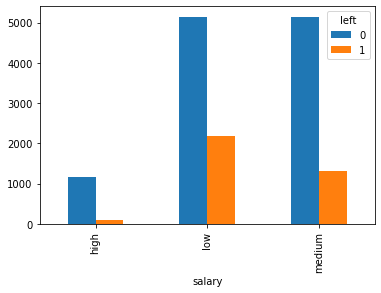

In [8]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

## Plot bar charts showing corelation between department and employee retention

**We use following variables as independant variables(X) in our model**

- Satisfaction Level
- Average Monthly Hours
- Promotion Last 5 Years
- Salary

In [9]:
new_df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [10]:
dummy = pd.get_dummies(new_df.salary, prefix="salary")
dummy

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [11]:
df_with_dummy = pd.concat([new_df,dummy],axis='columns')
df_with_dummy

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [13]:
df_with_dummy.drop('salary',axis='columns',inplace=True)
df_with_dummy.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


# Training dataset

In [14]:
X = df_with_dummy
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [15]:
y = df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

## Spliting the Training and Testing data set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
X_train.dtypes

satisfaction_level       float64
average_montly_hours       int64
promotion_last_5years      int64
salary_high                uint8
salary_low                 uint8
salary_medium              uint8
dtype: object

In [19]:
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [21]:
model.score(X_test,y_test)

0.7713333333333333